# linear regression
## spring
[link](https://docs.google.com/presentation/d/1L1LwpKm5DxhHndiyyiZ3wJA2mKOJTQ2heKo45Me5yVg/edit#slide=id.g1eaee6a347_0_8)

## fall
[link](https://ntumlta.github.io/2017fall-ml-hw1/)

- hw1.sh
 - Python3.5+ required
 - Only (1)numpy (2)scipy (3)pandas are allowed
 - numpy.linalg.lstsq is forbidden.
 - Please handcraft "linear regression" using Gradient Descent
 - beat public simple baseline
 - For those who wish to load model instead of running whole training precess:
 - please upload your training code named train.py
 - as long as there are Gradient Descent Code in train.py, it's fine
- hw1_best.sh
 - Python3.5+ required
 - any library is allowed
 - meet the higher score you choose in kaggle
 
 ### Data 簡介

* [train.csv](./data/train.csv) : 每個月前20天每個小時的氣象資料(每小時有18種測資)。共12個月。
* [test.csv](./data/test.csv) : 排除train.csv中剩餘的資料，取連續9小時的資料當feature，預測第10小時的PM2.5值。總共取240筆不重複的test data。
* [sampleSubmission.csv](./data/sampleSubmission.csv)
* [testing答案](./data/ans.csv)

## linear regression

找出 $f$ 使得  
loss function() $$L(f) = \sum_{f} (\hat{y}^n - f(x))^2$$ 最小 $f^* = arg \displaystyle \min_{f} L(f)$  
又因為 $f(X) = b + w \cdot X$, where $X \in \Omega, b \in \Bbb{F}$
可以寫成 $$L(b, w) = \sum_{b, w} (\hat{y}^n - b - w \cdot X)^2$$
引此可以將題目變成找
$$b^*, w^* = arg \min_{b,w} \sum_{b, w} (\hat{y}^n - b - w \cdot X)^2$$


## gradient descent
[code](#gdcode)  
$x_{n+1} = x_n - \eta_n\nabla{f(x_n)} $ s.t. $f(x_{n+1})\le f(x_n))$
現在 $f = L(W,b) = \displaystyle\sum_{X} (\hat{y} - b - W \cdot X)^2$因此
$$\begin{aligned}
\nabla L(w,b) &= 
    \begin{bmatrix}
    {\partial L(w_1,b)}\over{\partial w}  \\
    \vdots \\
    {\partial L(w,b)}\over{\partial b}
    \end{bmatrix}\\
 &=
    \begin{bmatrix}
     \sum_{X} -2 x_i (\hat{y} -b - W \cdot X) \\
     \vdots \\
     \sum_{X} -2 (\hat{y} - b - W\cdot X)
    \end{bmatrix}\\
\end{aligned}
$$  


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train = "./data/train.csv"
test = "./data/test.csv"

df = pd.read_csv(train, parse_dates={'date':[0]}, encoding='big5')
test_df = pd.read_csv(test, encoding='big5', header=None)

In [2]:
df.shape

(4320, 27)

In [3]:
df.head(18) #測項有18項

,date,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014-01-01,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014-01-01,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014-01-01,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014-01-01,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014-01-01,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014-01-01,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014-01-01,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014-01-01,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014-01-01,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014-01-01,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


In [4]:
def rainfall(raindata):
    try:
        return float(raindata)
    except:
        return 0

In [5]:
grouped = df.groupby("測項")
# rainfall is label data
df.iloc[grouped.groups.get("RAINFALL"),3:] = \
            df.iloc[grouped.groups.get("RAINFALL"),3:].applymap(rainfall)
# change data types
df.iloc[:,3:] = df.iloc[:,3:].astype(np.float16)

In [6]:
df.head(18)

,date,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014-01-01,豐原,AMB_TEMP,14.000000,14.000000,14.000000,13.000000,12.000000,12.000000,12.000000,...,22.000000,22.000000,21.000000,19.000000,17.000000,16.000000,15.000000,15.000000,15.000000,15.000000
1,2014-01-01,豐原,CH4,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805,...,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805
2,2014-01-01,豐原,CO,0.509766,0.409912,0.389893,0.370117,0.350098,0.300049,0.370117,...,0.370117,0.370117,0.469971,0.689941,0.560059,0.449951,0.379883,0.350098,0.360107,0.320068
3,2014-01-01,豐原,NMHC,0.199951,0.150024,0.130005,0.119995,0.109985,0.059998,0.099976,...,0.099976,0.130005,0.140015,0.229980,0.180054,0.119995,0.099976,0.090027,0.099976,0.080017
4,2014-01-01,豐原,NO,0.899902,0.600098,0.500000,1.700195,1.799805,1.500000,1.900391,...,2.500000,2.199219,2.500000,2.300781,2.099609,1.900391,1.500000,1.599609,1.799805,1.500000
5,2014-01-01,豐原,NO2,16.000000,9.203125,8.203125,6.898438,6.800781,3.800781,6.898438,...,11.000000,11.000000,22.000000,28.000000,19.000000,12.000000,8.101562,7.000000,6.898438,6.000000
6,2014-01-01,豐原,NOx,17.000000,9.796875,8.703125,8.601562,8.500000,5.300781,8.796875,...,14.000000,13.000000,25.000000,30.000000,21.000000,13.000000,9.703125,8.601562,8.703125,7.500000
7,2014-01-01,豐原,O3,16.000000,30.000000,27.000000,23.000000,24.000000,28.000000,24.000000,...,65.000000,64.000000,51.000000,34.000000,33.000000,34.000000,37.000000,38.000000,38.000000,36.000000
8,2014-01-01,豐原,PM10,56.000000,50.000000,48.000000,35.000000,25.000000,12.000000,4.000000,...,52.000000,51.000000,66.000000,85.000000,85.000000,63.000000,46.000000,36.000000,42.000000,42.000000
9,2014-01-01,豐原,PM2.5,26.000000,39.000000,36.000000,35.000000,31.000000,28.000000,25.000000,...,36.000000,45.000000,42.000000,49.000000,45.000000,44.000000,41.000000,30.000000,24.000000,13.000000


In [7]:
len(grouped.groups)

18

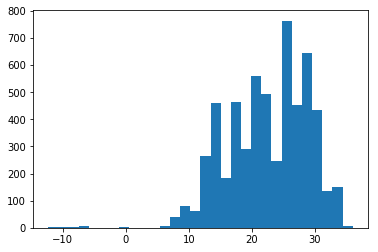

In [8]:
data = df.iloc[grouped.groups.get("AMB_TEMP"),3:].values.flatten()
n, bins, patches = plt.hist(data, bins=30)

In [9]:
data.std(dtype=np.float32)

6.289609

In [10]:
# # normalize
# for key, index in grouped.groups.items():
#     item_values = df.iloc[ index, 3:].values.flatten()
#     item_avg = item_values.mean(dtype=np.float32)
#     item_std = item_values.std(dtype=np.float64)
#     df.iloc[index,3:] = df.iloc[index,3:]-item_avg
#     df.iloc[index,3:] = df.iloc[index,3:]/item_std
#     print(key, item_avg, item_std)

In [11]:
grouped_bydate = df.groupby('date')

In [12]:
# 取連續9小時的資料當feature，預測第10小時的PM2.5
X_train = []
y_train = []
for date, index in grouped_bydate.groups.items():
    print(date)
    X_train.append(grouped_bydate.get_group(date).iloc[:,3:12].values.flatten())
    y_train.append(grouped_bydate.get_group(date).iloc[9,13])

2014-12-11 00:00:00
2014-08-04 00:00:00
2014-07-14 00:00:00
2014-02-01 00:00:00
2014-02-16 00:00:00
2014-10-13 00:00:00
2014-08-20 00:00:00
2014-07-03 00:00:00
2014-07-02 00:00:00
2014-05-01 00:00:00
2014-05-15 00:00:00
2014-07-08 00:00:00
2014-01-13 00:00:00
2014-07-20 00:00:00
2014-03-02 00:00:00
2014-11-03 00:00:00
2014-10-11 00:00:00
2014-03-06 00:00:00
2014-11-01 00:00:00
2014-10-20 00:00:00
2014-03-09 00:00:00
2014-11-07 00:00:00
2014-08-06 00:00:00
2014-01-04 00:00:00
2014-04-09 00:00:00
2014-07-11 00:00:00
2014-11-18 00:00:00
2014-07-19 00:00:00
2014-10-09 00:00:00
2014-02-03 00:00:00
2014-02-05 00:00:00
2014-03-04 00:00:00
2014-07-01 00:00:00
2014-01-07 00:00:00
2014-05-05 00:00:00
2014-02-08 00:00:00
2014-02-14 00:00:00
2014-05-08 00:00:00
2014-05-04 00:00:00
2014-04-04 00:00:00
2014-01-02 00:00:00
2014-06-17 00:00:00
2014-04-06 00:00:00
2014-04-12 00:00:00
2014-01-10 00:00:00
2014-10-01 00:00:00
2014-11-11 00:00:00
2014-09-04 00:00:00
2014-01-20 00:00:00
2014-01-12 00:00:00


In [13]:
type(X_train[0])

numpy.ndarray

In [14]:
test = np.matrix(X_train)

In [15]:
test_std = (test-test.mean(axis=0))/test.std(0)

/home/ada/.local/lib/python3.5/site-packages/numpy/core/_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [16]:
class standardize():
    mean = None
    std = None
    def __init__(self):
        pass
    def fit(self, X):
        '''X as matrix like'''
        X = np.matrix(X)
        self.mean = X.mean(0, dtype=np.float32)
        self.std = X.std(0, dtype=np.float64)
    def transfer(self, X):
        try:
            return ((X-self.mean)/self.std).getA()
        except:
            print("dimesion may be same of fitting")
            

In [17]:
std = standardize()

In [18]:
std.fit(X_train)

In [19]:
X = std.transfer(X_train)

In [20]:
X.shape

(240, 162)

In [21]:
ystd = standardize()
ystd.fit(np.matrix(y_train).T)
y = ystd.transfer(y_train).T

In [22]:
y

array([[-1.00892384],
       [-0.57839501],
       [-0.2093703 ],
       [ 0.65168735],
       [ 0.03664617],
       [ 0.28266265],
       [-0.45538677],
       [ 0.52867912],
       [ 1.02071206],
       [ 0.467175  ],
       [-1.31644443],
       [-0.51689089],
       [-0.82441148],
       [-0.2093703 ],
       [-1.25494031],
       [-0.14786618],
       [-0.63989913],
       [-0.33237854],
       [ 2.31229855],
       [ 0.71319147],
       [-1.31644443],
       [ 1.02071206],
       [-1.25494031],
       [ 1.69725736],
       [ 1.75876148],
       [-0.27087442],
       [ 0.59018324],
       [-0.33237854],
       [-0.57839501],
       [ 0.65168735],
       [-0.82441148],
       [ 1.08221618],
       [ 1.1437203 ],
       [ 1.26672854],
       [-1.37794855],
       [-0.94741972],
       [-0.33237854],
       [-1.31644443],
       [-0.82441148],
       [-0.2093703 ],
       [ 0.22115853],
       [-0.94741972],
       [ 1.69725736],
       [ 0.95920795],
       [-1.07042795],
       [ 0

## gdcode
[thm](#gradient-descent)

In [23]:
# 
def loss_func( b, W, X=X, y=y_train):
    result = 0
    w = np.array(W)
    for idx in range(len(y)):
        result = result + ( y[idx] - b - np.dot(w, X[idx]))**2
    return np.asscalar(result)

In [24]:
X[0].shape

(162,)

In [25]:
for i in range(10):
    W = np.random.rand(163)
    print(loss_func(W[0],W[1:], X, y_train))


204612.9906683748
210768.717823878
209287.42234570725
214233.14641395447
201734.09774328332
217031.88762703832
204815.4261077129
206118.32833169968
215002.21087549115
216979.27527208143


In [26]:
def grad( b, W, X=X, y=y):
    """
    input b scale, W array_like
    ouput grad L(b,W)
    """
    card_datas = len(y)
    #b_array = np.full(card_datas, b)
    W = np.array(W)
    #X = np.ndarray(X)
    #y = np.array(y)
    feature_length = len(W)
    b_sum = 0
    w_sum = np.zeros(feature_length)
    for idx in range(card_datas):
        err = (y[idx] - b - np.dot(W, X[idx]))
        b_sum = b_sum - 2*err
        w_sum = w_sum - 2*err*X[idx]
    return (b_sum, w_sum)

In [27]:
b = 0
W = np.zeros(162)
eta = 0.00001
loss_0 = loss_func(b,W)
loss_1 = loss_0 + 1 
vis_loss = []
for i in range(2000):
    gb, gW = grad(b, W, X, y)
    b = b - eta*gb
    W = W - eta*gW
    vis_loss.append(loss_func(b,W))

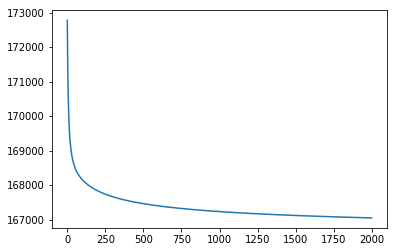

In [28]:
plt.plot(vis_loss[:])

In [29]:
b = 0
W = np.zeros(162)
eta = 0.0001
loss_0 = loss_func(b,W)
loss_1 = loss_0 -1 
count = 2
while True:
    tmp_err = loss_0 - loss_1 #error test avoid the loop too long
    gb, gW = grad(b,W)
    b = b - eta*gb
    W = W - eta*gW
    loss_0 = loss_1
    loss_1 = loss_func(b,W)
    count += 1
    if abs(tmp_err - loss_0 + loss_1) < 1e-5 or count > 5000:
        break
print(loss_0, loss_1, count)

166553.64897072705 166553.62315505746 3836


In [30]:
def predict(x, w=W, b=b):
    X = np.array(x)
    B = np.zeros(X.shape[0])
    B.fill(np.asscalar(b))
    return B+np.dot(X,W)
    

In [31]:
W.shape, b

((162,), array([-1.53029728e-07]))

In [32]:
x=[np.zeros(162) for i in range(3)]
predict(x)

array([-1.53029728e-07, -1.53029728e-07, -1.53029728e-07])

## Differential
Suppose $f:\mathbb{R}^n \rightarrow \mathbb{R}$, we diefined the partail derivative of $f$ at $(x_i) \in \mathbb{R}^n$as following form $$\frac{\partial f}{\partial x_k}(x_i) = f_{k}^\prime = \lim_{h\rightarrow 0}\frac{1}{h}(f(x_1,...,x_k+h,...,x_n)-f(x_1,...,x_k,...,x_n)).$$  
If the limit exists $f$ is called different at k-component.  
The limit can write right limit $$\lim_{k\rightarrow \infty} k \cdot (f(x_1,...,x_k+\frac{1}{k},...,x_n)-f(x_1,...,x_k,...,x_n))$$and left limit, if both exits and same it also can said if differentialable.

**Notion**: if $(x_k)$ $f_k^\prime$ exist, for all $1\le k \le n$, is **NOT** imply f is differential at $(x_k)$, but converse is true.

In [33]:
import numpy

def partial(func, point, i=0,epsilon=1e-6, limit=32):
    ''' 
    partial(i,func, [x_1,...x_n], epsilon=1e-6, limit=32) return the i-th partail value at x
    if the derivate not exit return None
    Here supposes f(x) = a is a n-d real to 1-d real number
    i: i-th component, begin 1
    func: function or mapping
    x: array-like
    epsilon: precision of derivate
    limt: the limit digit of computing derivate, 
    '''
    x = np.array(point)
    delta_h = np.zeros(x.size)
    fx = func(x)
    count = 0
    M = 1
    left_lim = 1
    right_lim = left_lim+1+epsilon
    while abs(right_lim - left_lim) > epsilon :
        delta_h[i-1] = 1/M
        right_lim = (func(x+delta_h) - fx)*M
        left_lim = (fx - func(x-delta_h))*M
        M = M*2
        count = count +1
        if count >= limit:
            return None 
    return (left_lim+right_lim)/2

In [34]:
def f(x):
    return 1/np.linalg.norm(x)

In [35]:
partial(f,[1,1])

-0.35355339059606194

In [36]:
print(partial(abs,0))

None
